# <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Loading Packages </p>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
import warnings
warnings.simplefilter(action='ignore')

In [2]:
"""!pip3 install -U ucimlrepo 
from ucimlrepo import fetch_ucirepo, list_available_datasets

# check which datasets can be imported
list_available_datasets()
heart_disease = fetch_ucirepo(name= 'Breast Cancer Wisconsin (Original)')
heart_disease """ 

"!pip3 install -U ucimlrepo \nfrom ucimlrepo import fetch_ucirepo, list_available_datasets\n\n# check which datasets can be imported\nlist_available_datasets()\nheart_disease = fetch_ucirepo(name= 'Breast Cancer Wisconsin (Original)')\nheart_disease "

In [3]:
url = 'https://archive.ics.uci.edu/static/public/15/data.csv'
df = pd.read_csv(url)

# <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Data Overview</p>

In [4]:
df.sample(5)

,Sample_code_number,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
596,1325309,4,1,2,1,2,1.0,2,1,1,2
166,1197993,5,6,7,8,8,10.0,3,10,3,4
20,1054590,7,3,2,10,5,10.0,5,4,4,4
377,654244,1,1,1,1,1,1.0,2,1,1,2
158,1193683,1,1,2,1,3,NaN,1,1,1,2


In [5]:
print("Dataset shape: ", df.shape)

Dataset shape:  (699, 11)



## Factors Affecting Breast Cancer Diagnosis

1. **Sample_code_number**:
   - Effect: This is typically an identifier and does not have a direct effect on the diagnosis. It's used to uniquely identify each sample in the dataset.

2. **Clump_thickness**:
   - Effect: Refers to the thickness of cell clumps. Higher clump thickness may indicate malignancy, as cancerous cells tend to form thicker and more irregular clumps compared to benign cells.

3. **Uniformity_of_cell_size**:
   - Effect: Measures how uniform the size of cells is. Malignant cells often vary greatly in size, leading to lower uniformity, which is a strong indicator of cancer.

4. **Uniformity_of_cell_shape**:
   - Effect: Similar to cell size, this measures the uniformity of cell shape. A high degree of variability in cell shape is associated with malignancy.

5. **Marginal_adhesion**:
   - Effect: Refers to how closely the cells stick to each other. In cancerous tissues, cells often lose their adhesive properties, leading to lower values in this feature.

6. **Single_epithelial_cell_size**:
   - Effect: Refers to the size of single epithelial cells. Larger sizes can be indicative of malignancy, as cancerous cells tend to grow larger and more irregular.

7. **Bare_nuclei**:
   - Effect: This feature represents cells with bare nuclei, which are cells where the nucleus is visible without surrounding cytoplasm. The presence of bare nuclei is more common in malignant cells.

8. **Bland_chromatin**:
   - Effect: Chromatin is the material within a cell nucleus that contains DNA. In cancerous cells, chromatin often appears coarser and more irregular. Thus, the texture of chromatin (whether it is bland or not) can help distinguish between benign and malignant cells.

9. **Normal_nucleoli**:
   - Effect: Nucleoli are small, typically round structures within the nucleus. An increased number or irregular appearance of nucleoli often indicates malignancy.

10. **Mitoses**:
    - Effect: This refers to the process of cell division. A higher number of mitoses is associated with more aggressive, rapidly growing cancers, as cancerous cells tend to divide more frequently.

11. **Class**:
    - Effect: This is the target variable indicating whether the tumor is benign (non-cancerous) or malignant (cancerous). It’s determined based on the values of the other factors.


In [6]:
column_names = ['Sample_code_number', 'Clump_thickness', 'Uniformity_of_cell_size', 'Uniformity_of_cell_shape', 'Marginal_adhesion','Single_epithelial_cell_size', 'Bare_nuclei', 'Bland_chromatin', 'Normal_nucleoli', 'Mitoses', 'Class']

for col in column_names:
    print(f"{col}: {df[col].nunique()}")

Sample_code_number: 645
Clump_thickness: 10
Uniformity_of_cell_size: 10
Uniformity_of_cell_shape: 10
Marginal_adhesion: 10
Single_epithelial_cell_size: 10
Bare_nuclei: 10
Bland_chromatin: 10
Normal_nucleoli: 10
Mitoses: 9
Class: 2


In [7]:
df.isnull().sum()

Sample_code_number              0
Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [8]:
df = df.dropna()
df.isnull().sum().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sample_code_number           683 non-null    int64  
 1   Clump_thickness              683 non-null    int64  
 2   Uniformity_of_cell_size      683 non-null    int64  
 3   Uniformity_of_cell_shape     683 non-null    int64  
 4   Marginal_adhesion            683 non-null    int64  
 5   Single_epithelial_cell_size  683 non-null    int64  
 6   Bare_nuclei                  683 non-null    float64
 7   Bland_chromatin              683 non-null    int64  
 8   Normal_nucleoli              683 non-null    int64  
 9   Mitoses                      683 non-null    int64  
 10  Class                        683 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 64.0 KB


## <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Basic Statistics</p>


In [10]:
df.describe()

,Sample_code_number,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Exploratory Data Analysis + Visualition</p>

> whether the tumor is benign (non-cancerous) or malignant (cancerous)

> in dataset Class variable info

> 2 = benign, 4 = malignant

In [11]:
df.head()

,Sample_code_number,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


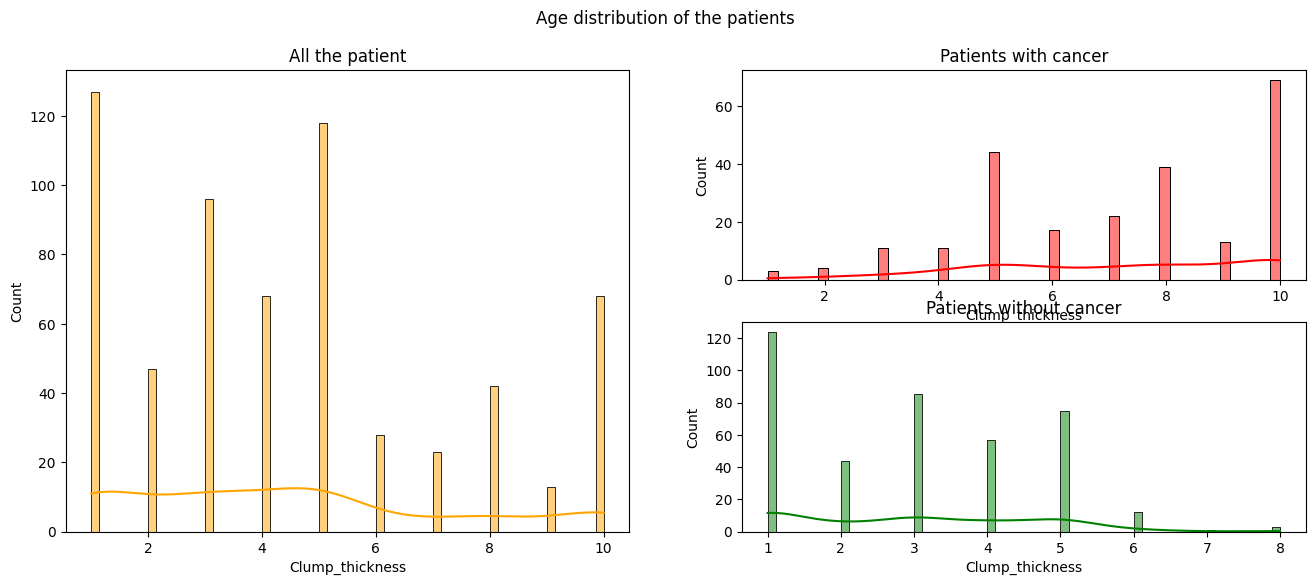

In [12]:
all_patient = df.groupby('Sample_code_number')['Clump_thickness'].apply(lambda x: x.unique()[0])
no_cancer_patient = df[df['Class'] == 2].groupby('Sample_code_number')['Clump_thickness'].apply(lambda x: x.unique()[0])
cancer_patient  = df[df['Class'] == 4].groupby('Sample_code_number')['Clump_thickness'].apply(lambda x: x.unique()[0])

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.histplot(all_patient, bins=63, color='orange', kde=True)
plt.title("All the patient")

plt.subplot(2, 2, 2)
sns.histplot(cancer_patient , bins=51, color='red', kde=True)
plt.title("Patients with cancer")

plt.subplot(2, 2, 4)
sns.histplot(no_cancer_patient, bins=63, color='green', kde=True)
plt.title("Patients without cancer")


plt.suptitle("Age distribution of the patients")
plt.show()

## <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Pair Plot</p>

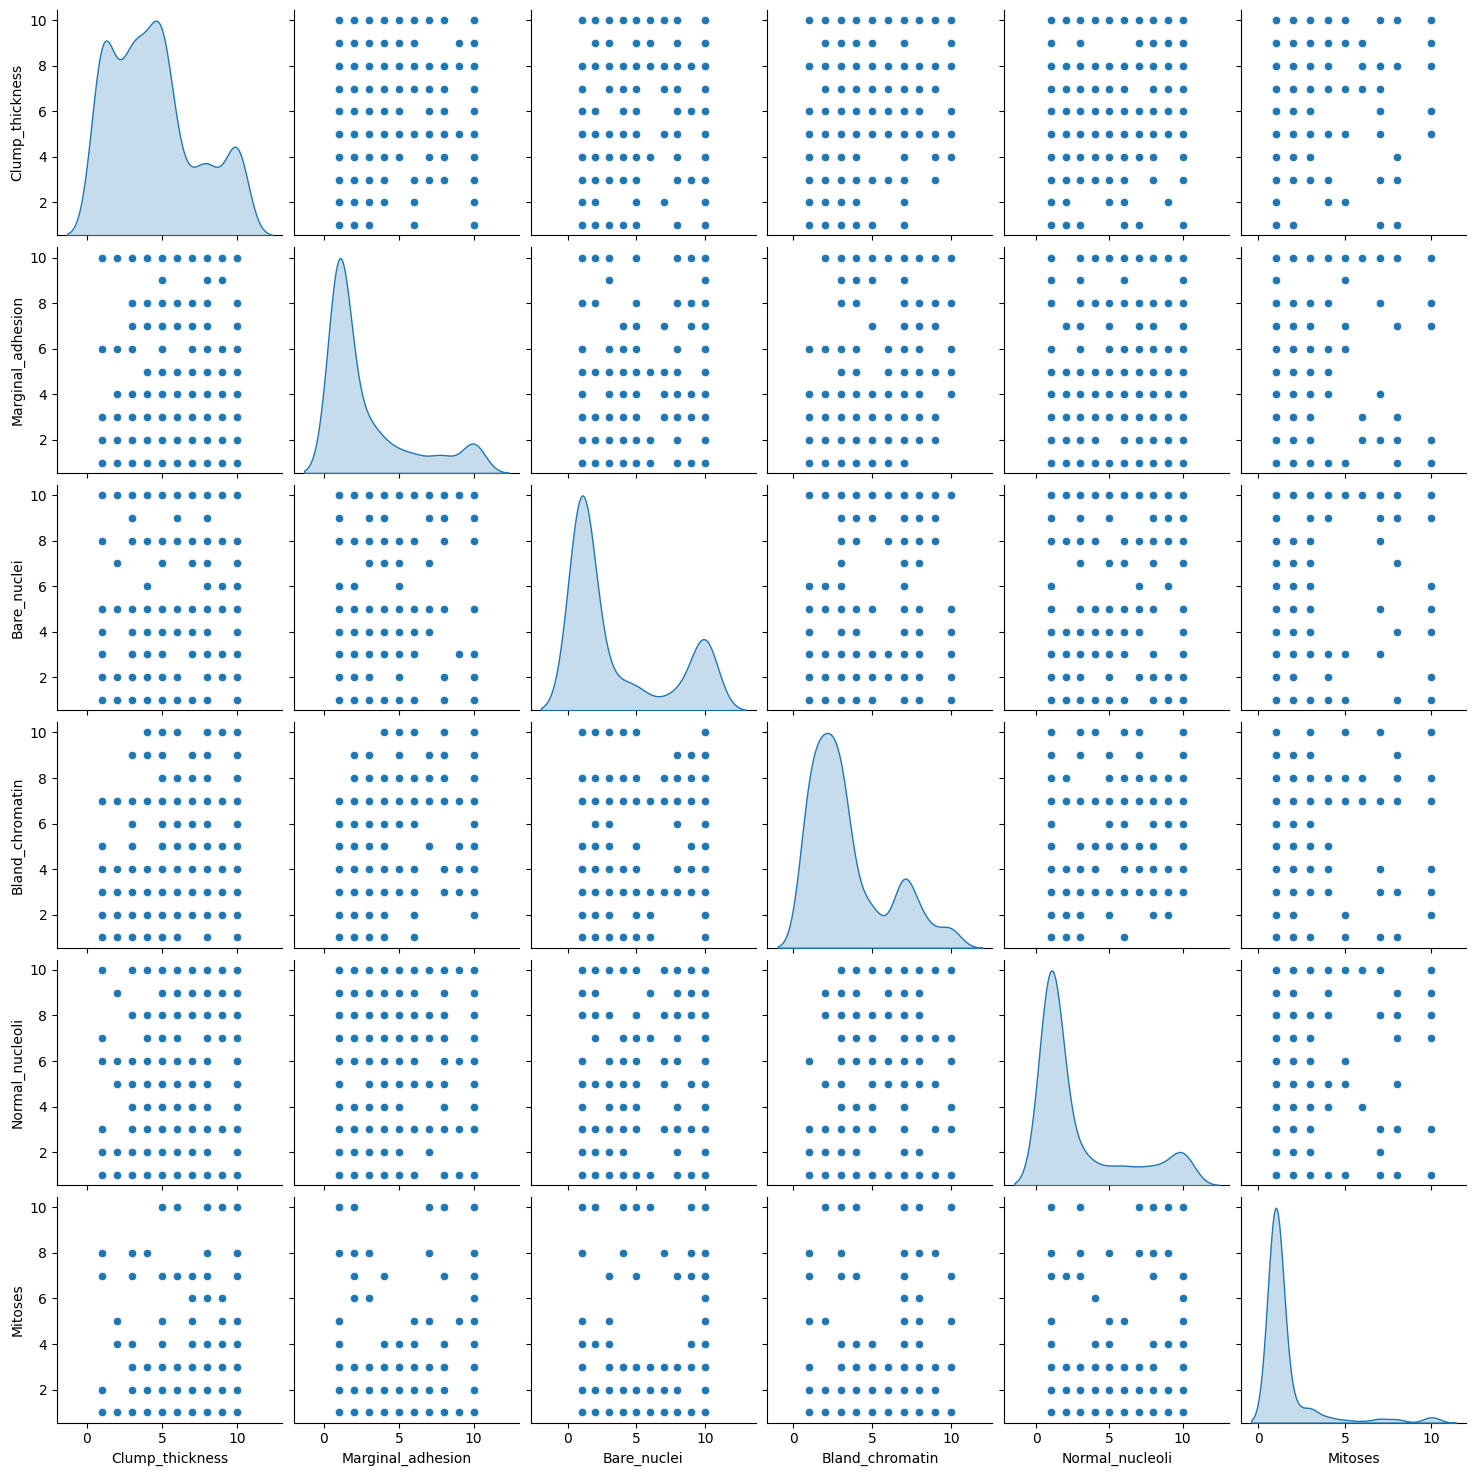

In [13]:
sns.pairplot(df[['Clump_thickness', 'Marginal_adhesion', 'Bare_nuclei', 'Bland_chromatin', 'Normal_nucleoli', 'Mitoses']], diag_kind='kde')

## <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Count Plot</p>

Class
2    444
4    239
Name: count, dtype: int64


<Axes: ylabel='count'>

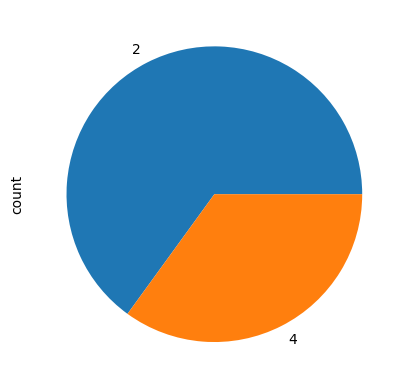

In [14]:
print(df["Class"].value_counts())

df["Class"].value_counts().plot(kind="pie")

## <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Box Plot</p>

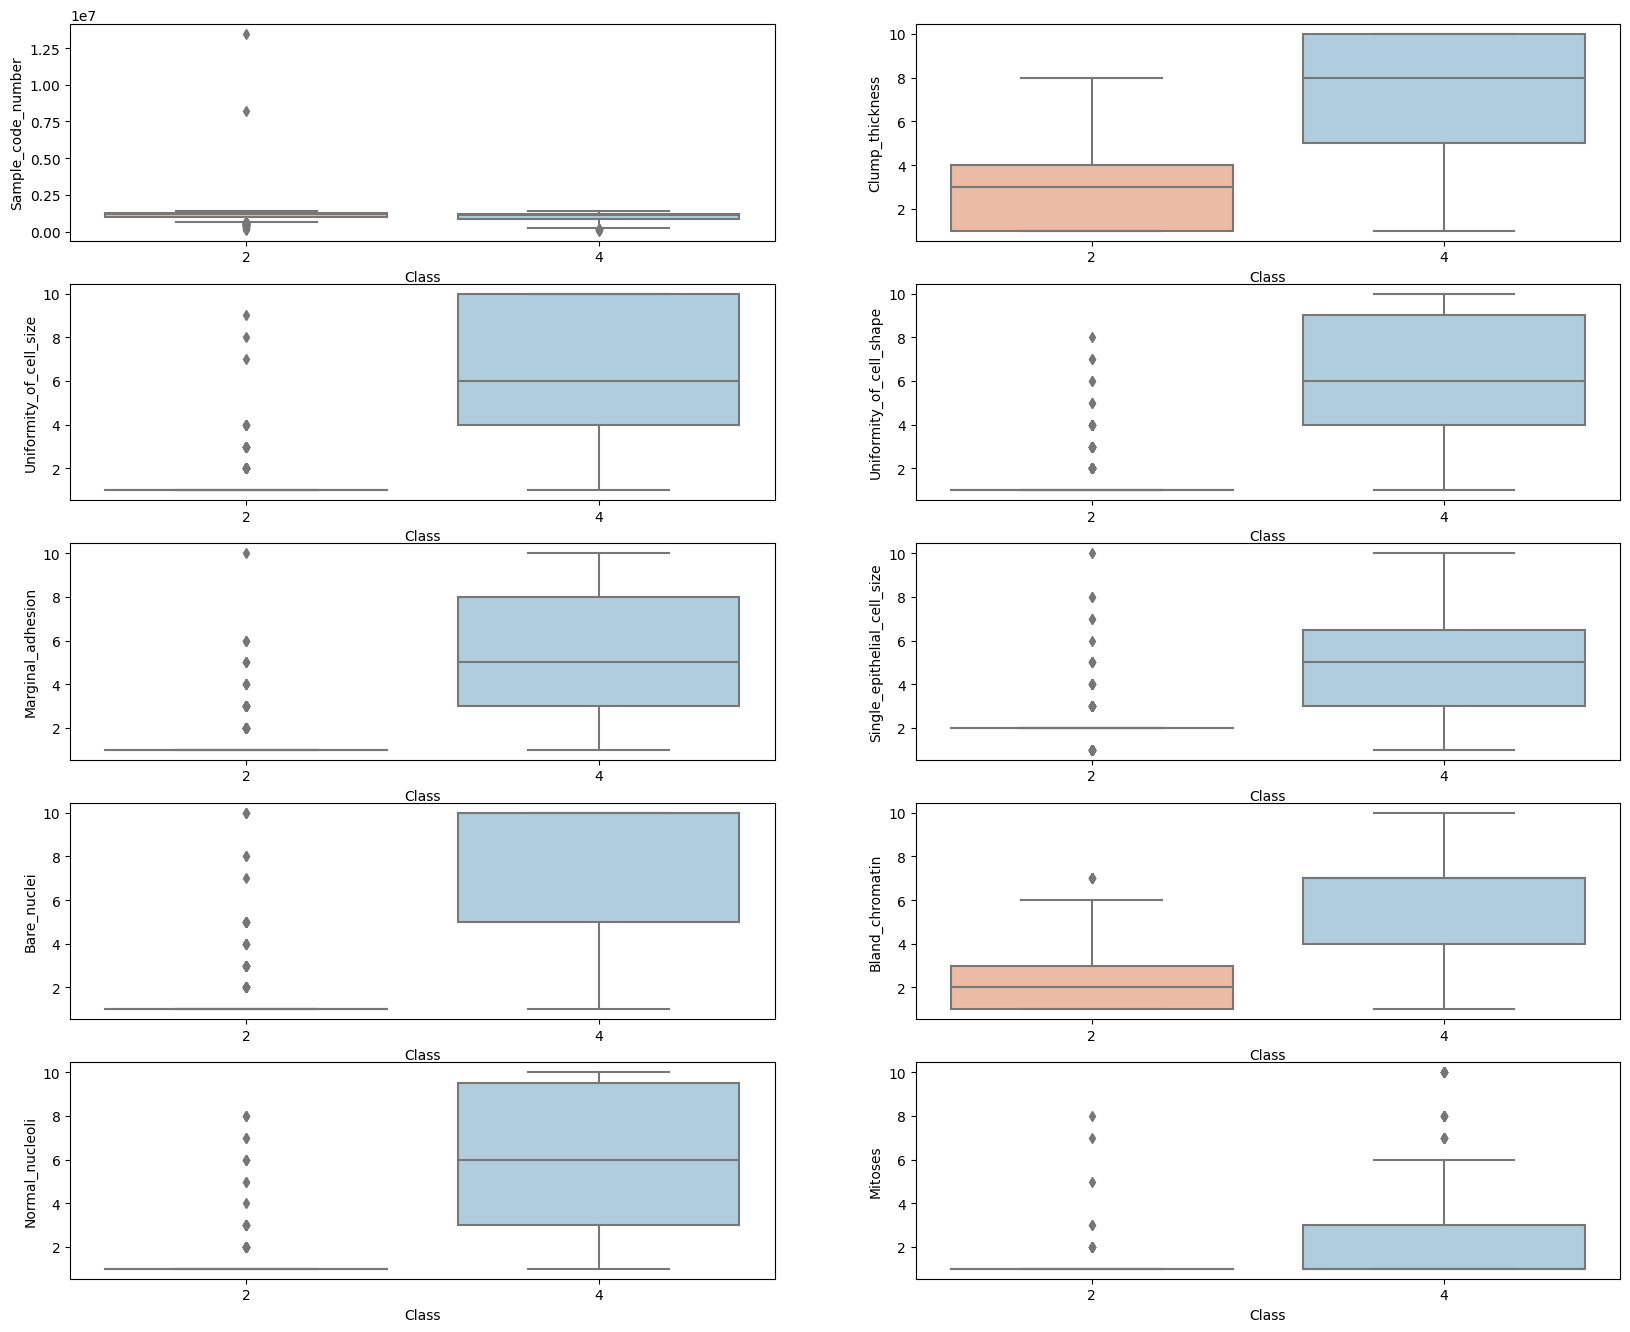

In [15]:
column_names = ['Sample_code_number', 'Clump_thickness', 'Uniformity_of_cell_size', 'Uniformity_of_cell_shape', 'Marginal_adhesion','Single_epithelial_cell_size', 'Bare_nuclei', 'Bland_chromatin', 'Normal_nucleoli', 'Mitoses']

fig=plt.figure(figsize=(20,50))
for i,col in enumerate(column_names):
    ax=fig.add_subplot(15,2,i+1)
    sns.boxplot(y=df[col],x=df['Class'], palette = "RdBu")

## <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Heatmap</p>

<Axes: >

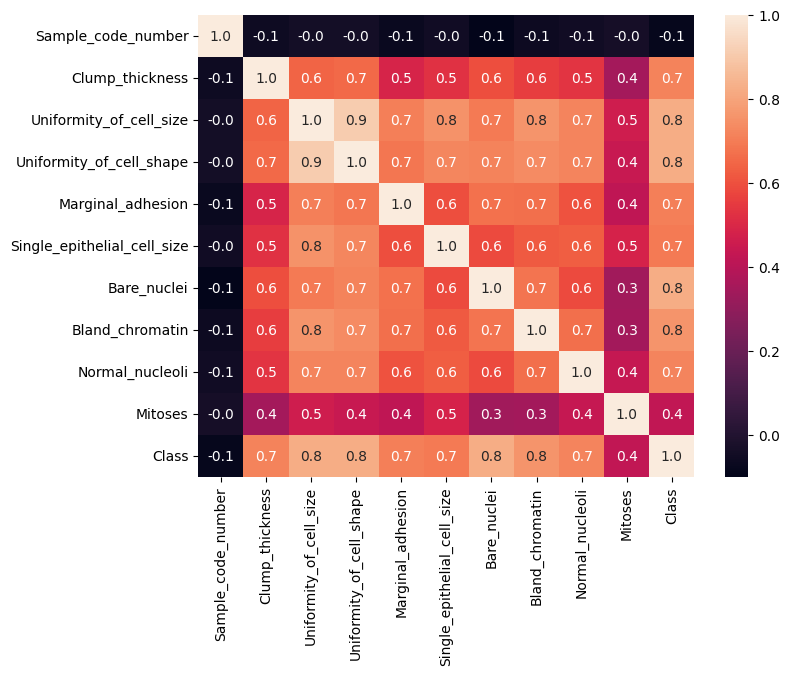

In [16]:
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(),annot = True , fmt='.1f' )
#sns.heatmap(df[cols].corr(), annot=True, fmt='.1f')

# <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Feature Engineering</p>

In [17]:
df.sample(5)

,Sample_code_number,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
9,1033078,4,2,1,1,2,1.0,2,1,1,2
484,787451,5,1,2,1,2,1.0,1,1,1,2
646,1311033,1,2,2,1,2,1.0,1,1,1,2
470,1211594,3,1,1,1,1,1.0,2,1,1,2
653,1324681,4,1,1,1,2,1.0,2,1,1,2


## One Hot Encoding

In [18]:
df['Class'] = df['Class'].map({2: 'Benign', 4: 'Malignant'})

In [19]:
df.sample(5)

,Sample_code_number,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
34,1075123,3,1,2,1,2,1.0,2,1,1,Benign
20,1054590,7,3,2,10,5,10.0,5,4,4,Malignant
638,1277792,4,1,1,1,2,1.0,1,1,1,Benign
426,1258556,5,3,6,1,2,1.0,1,1,1,Benign
54,1110524,10,5,5,6,8,8.0,7,1,1,Malignant


In [20]:
df = pd.get_dummies(df, columns=['Class'], prefix='', prefix_sep='')
df.sample(5)

,Sample_code_number,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Benign,Malignant
169,1199219,1,1,1,2,1,1.0,1,1,1,True,False
476,1296025,4,1,2,1,2,1.0,1,1,1,True,False
4,1017023,4,1,1,3,2,1.0,3,1,1,True,False
520,333093,1,1,1,1,3,1.0,1,1,1,True,False
370,492561,4,3,2,1,3,1.0,2,1,1,True,False


# <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;"> Model Training  </p>

In [21]:
X = df.drop('Malignant',axis=1)
y = df['Malignant']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [22]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
    
# Make predictions on the test set
predictions = model.predict(X_test)

# <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Model Evaluation</p>

In [23]:
accuracy = metrics.accuracy_score(y_test, predictions)
precision = metrics.precision_score(y_test, predictions, average='weighted')
recall = metrics.recall_score(y_test, predictions, average='weighted')
f1 = metrics.f1_score(y_test, predictions, average='weighted')
    
print("Accuracy: {:.3%}".format(accuracy))
print("Precision: {:.3%}".format(precision))
print("Recall: {:.3%}".format(recall))
print("F1 Score: {:.3%}".format(f1))

Accuracy: 100.000%
Precision: 100.000%
Recall: 100.000%
F1 Score: 100.000%


# <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Confusion Matrix</p>

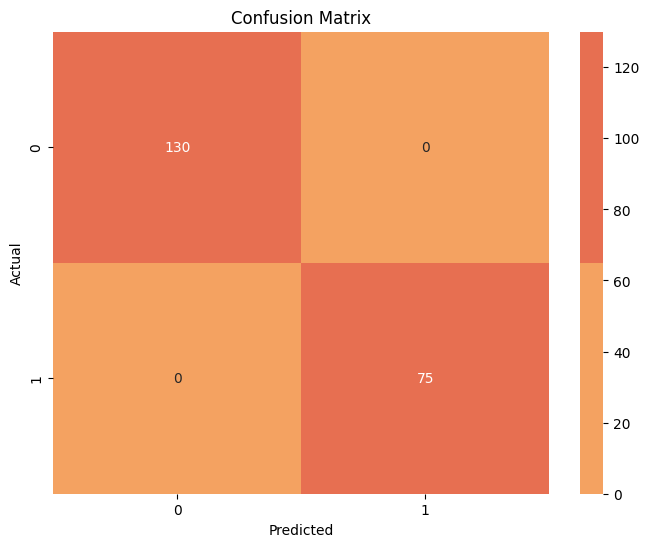

In [24]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=['#F4A261','#E76F51'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()